[[0.72172252 0.68252201]
 [0.86799554 0.73747489]]
[5 4]
Added initial point [0.72172252 0.68252201]
[6 5]
Added initial point [0.86799554 0.73747489]


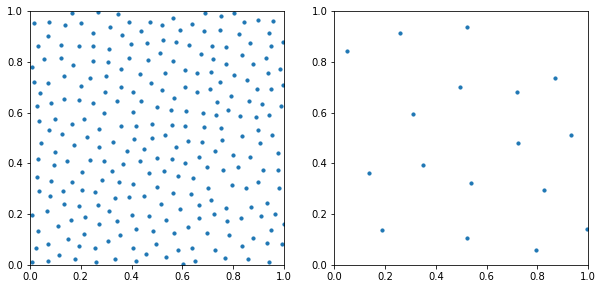

In [3]:
# Poisson disc sampling in arbitrary dimensions
# Implementation by Pavel Zun, pavel.zun@gmail.com
# BSD licence - https://github.com/diregoblin/poisson_disc_sampling

# -----------------------------------------------------------------------------
# Based on 2D sampling by Nicolas P. Rougier - https://github.com/rougier/numpy-book
# -----------------------------------------------------------------------------
import numpy as np
import poisson_disc as pd
# plotting tools
# %matplotlib widget
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import time

def current_milli_time():
    return round(time.time() * 1000)

if __name__ == '__main__':

    # default: 2D points, classic Bridson algorithm as described here:
    # https://www.cs.ubc.ca/~rbridson/docs/bridson-siggraph07-poissondisk.pdf
    points = pd.Bridson_sampling()

    fig, ax = plt.subplots(1, 2, figsize=(10,20))
    ax[0].scatter(points[:,0], points[:,1], s=10)
    ax[0].set_xlim(0, 1)
    ax[0].set_ylim(0, 1)
    ax[0].set_aspect('equal')
    
    # alternative sampler, results in denser points: 
    # based on the method proposed here by Martin Roberts: http://extremelearning.com.au/an-improved-version-of-bridsons-algorithm-n-for-poisson-disc-sampling/
    dims2d = np.array([1.0,1.0])
    in_points=np.random.sample((2,2))
    print(in_points)
    points_surf = pd.Bridson_sampling(dims=dims2d, radius=0.2, k = 30, initial = in_points, generate = 20)
    
    ax[1].scatter(points_surf[:,0], points_surf[:,1], s=10)
    ax[1].set_xlim(0, 1)
    ax[1].set_ylim(0, 1)
    ax[1].set_aspect('equal')
    
    # 3D points
    #dims3d = np.array([1.0,1.0,1.0])
    #tinit = current_milli_time()
    #points3d = pd.Bridson_sampling(dims3d, radius=0.05, k=30)
    #print("3D sample generated in", current_milli_time() - tinit, "ms")
    #fig3d = plt.figure()
    #ax3d = Axes3D(fig3d)
    #ax3d.scatter(points3d[:,0], points3d[:,1], points3d[:,2])
    plt.show()

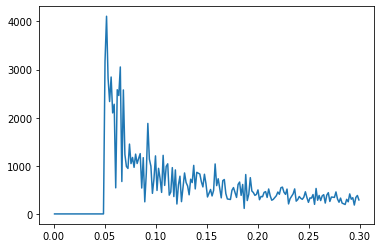

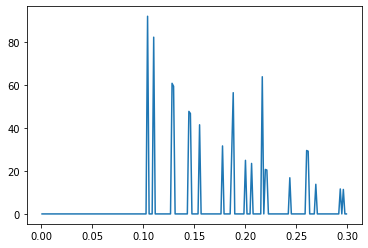

NameError: name 'points3d' is not defined

In [2]:
#Radial distribution function
import math

def print_rdf(points, dims, rmax = 0.3, Nbins = 200):
    ndim = points.shape[1]
    distances = []
    for point1 in points:
        # only look in the center to avoid edge effects
        if np.all(np.zeros(ndim) <= point1 - rmax) and np.all(point1 + rmax < dims):
            for point2 in points:
                if np.any(point1 != point2):
                    distances.append(math.sqrt(pd.squared_distance(point1, point2)))

    binwidth = rmax / Nbins
    # declare a list of r values
    rs = np.linspace(binwidth/2, rmax - binwidth/2, Nbins)

    # weight the bins by 1 / r^ndim (3 in the 3D case) (missing some constants to make it a real spherical shell volume)
    f2 = lambda i: 1/i**ndim
    weights_array = f2(rs)
    hist, bin_edges = np.histogram(distances, Nbins, range=(0,rmax))
    
    figDist = plt.figure()
    ax = plt.axes()
    ax.plot(rs, hist * weights_array)
    
    plt.show()    
    

# No two points are closer than "radius" to each other        
print_rdf(points, dims2d)

# Alternative sampling produces a very strong peak at "radius" (plus eps)
print_rdf(points_surf, dims2d)

# More points in 3D produce a smoother RDF
print_rdf(points3d, dims3d)


In [ ]:
# Hypersphere sampling test

fig1 = plt.figure()
fig1, ax1 = plt.subplots(1, 2, figsize=(10,20))
center = np.array([0,0])
radius = 1
p = pd.hypersphere_volume_sample(center,radius,1000)
ax1[0].scatter(p[:,0],p[:,1],s=0.5)
ax1[0].add_artist(plt.Circle(center,radius,fill=False,color='0.5'))
ax1[0].set_xlim(-1.5,1.5)
ax1[0].set_ylim(-1.5,1.5)
ax1[0].set_aspect('equal')

p = pd.hypersphere_surface_sample(center,radius*0.95,200)
ax1[1].scatter(p[:,0],p[:,1],s=3.0)
ax1[1].add_artist(plt.Circle(center,radius,fill=False,color='0.5'))
ax1[1].set_xlim(-1.5,1.5)
ax1[1].set_ylim(-1.5,1.5)
ax1[1].set_aspect('equal')

In [ ]:
# and a test for 5d points
# takes several minutes to complete even for large discs 
dims5d = np.array([1.0,1.0,1.0,1.0,1.0])
points5d = pd.Bridson_sampling(dims5d, radius=0.25, k=30)
print_rdf(points5d, dims5d)